In [1]:


import cv2
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')


In [29]:
img = plt.imread('image1.jpg')


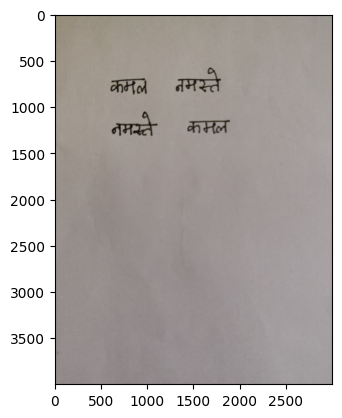

In [30]:
plt.imshow(img)


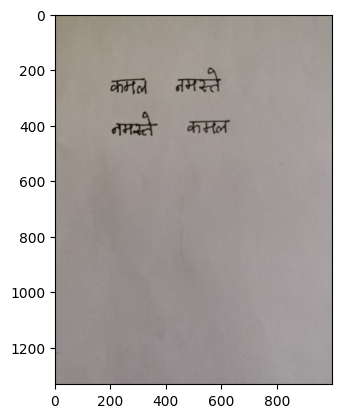

In [32]:
image_path = '/content/drive/MyDrive/Colab Notebooks'
img = cv2.imread('image1.jpg')
if img is not None:  # Check if the image was loaded successfully
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, c = img.shape #height,width,channel

    if w > 1000:  #reducing the image size to 1000 if w>1000 
        new_w = 1000
        ar = w / h   #aspect ratio
        new_h = int(new_w / ar)

        img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA) #resizing the image

    plt.imshow(img)
    plt.show()
else:
    print("Failed to load the image.")

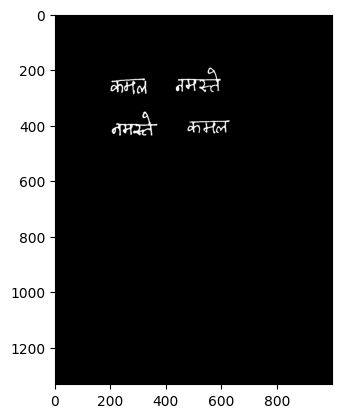

In [35]:
#Finding the threshold
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #convert image to grayscale
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV) #apply thresholding (below 80-black)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img)

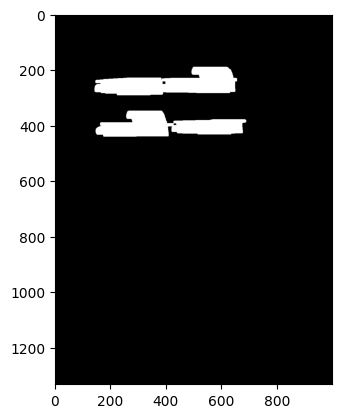

In [55]:
#dilation (find lines)
kernel = np.ones((7,118), np.uint8) #rectangular kernel dimensions 7,118
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray')

In [56]:
#find contours
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

Line Segmentation

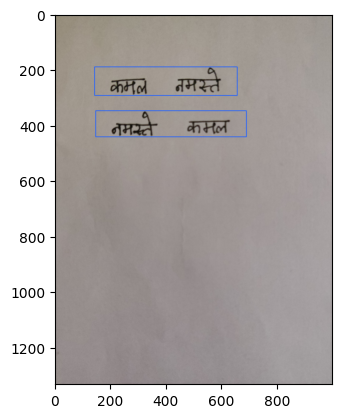

In [57]:
img2 = img.copy()

for ctr in sorted_contours_lines:

    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)

plt.imshow(img2)

Text Segmentation

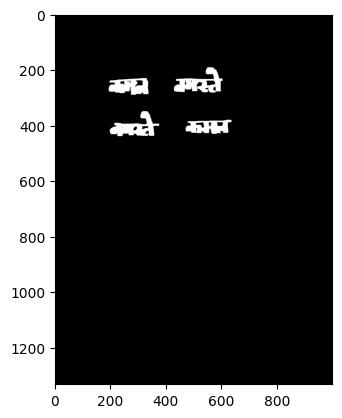

In [39]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray')

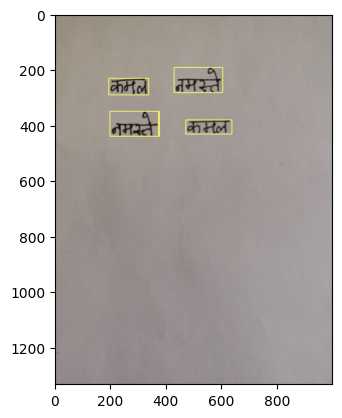

In [40]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:

    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]

    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])

    for word in sorted_contour_words:

        if cv2.contourArea(word) < 400:
            continue

        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)

plt.imshow(img3)

In [47]:
print(words_list)

[[428, 192, 603, 283], [470, 381, 636, 432], [193, 231, 337, 291], [197, 350, 372, 440], [197, 350, 375, 440], [470, 381, 636, 432]]


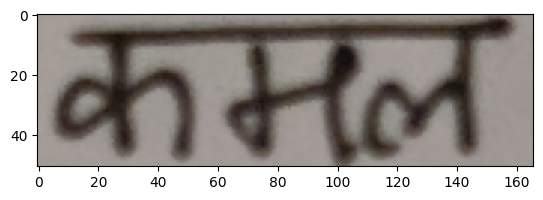

In [69]:
word = words_list[0]
roi_9 = img[word[1]:word[3], word[0]:word[2]]
plt.imshow(roi_9)
